# EDA of the Airbnb listings in Málaga

## Introduction
This analysis is based on previous studies performed at the Dasta Analysis Bootcamp of CodeOp.<br>
The objective of this EDA is to identify which features can most affect the price asked for the listings in Malaga.<br> These are some of the columns that I'll be analysing:<br>

- reviews
- bed
- neighbourhood
- instant bookable
  
## Source

The dataset used in thi EDA is part of Airbnb Inside and can be found here: http://insideairbnb.com/get-the-data/ with last update date on 31st December, 2023.

This noteboomp is composed of two parts:
- Dataframe preprocessing
- Data analysis via Graphs

## Part I - Preprocessing

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
listings = pd.read_csv('listings_EDA.csv')

Before starting the preprocessing itself I need to see the rows and colums present in the Dataset.<br>
I used the head function to see the first 5 rows of it.

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,https://www.airbnb.com/rooms/96033,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2...,NaN,"A 200 metros de las playas de El Palo, antiguo...",https://a0.muscache.com/pictures/32780788/e487...,510467,...,4.92,4.40,4.60,VFT/MA/22043,f,1,1,0,0,1.66
1,166473,https://www.airbnb.com/rooms/166473,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,793360,...,4.91,4.81,4.70,NaN,f,4,0,4,0,0.63
2,212845,https://www.airbnb.com/rooms/212845,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/d4a19330-03c4...,617998,...,4.88,4.57,4.76,VFT/MA/09354,f,2,0,1,1,0.30
3,330760,https://www.airbnb.com/rooms/330760,20231231043937,2023-12-31,city scrape,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 be...,NaN,Málaga Lodge is situated next to the famous Sa...,https://a0.muscache.com/pictures/85419390/38a9...,1687526,...,4.58,4.48,4.45,VFT/MA/12240,t,6,4,2,0,0.38
4,340024,https://www.airbnb.com/rooms/340024,20231231043937,2023-12-31,city scrape,Rental unit in Málaga · ★4.83 · 1 bedroom · 1 ...,NaN,It is a central area and has all kinds of serv...,https://a0.muscache.com/pictures/e5a7e85a-ad98...,1725690,...,4.83,4.72,4.79,VFT/MA/02334,f,1,1,0,0,1.86


Some of the columns we have here are:

- Review-scores-value: Average of stars from 1 to 5 received.
- Instant-bookable: f= No and t= Yes
- Neighbourhood_cleansed: Neighbourhood of the listings without any empty value.

### Preprocessing Steps:

1. In order to see how many columns and rows are present in this Dataset I'm using the shape function.

In [5]:
listings.shape
print(f'We have in this dataset {listings.shape[0]} rows and {listings.shape[1]} columns')

We have in this dataset 7783 rows and 75 columns


2. As this Dataset is small I'm creating a copy so that I could leave the original data untouched.

In [6]:
listings_clean = listings.copy()

3. Here, I'm trying to identify how many NaNs (empty values) are in this dataset per column.

In [7]:
#Iterate with the columns to find the amount of NANs of each column

for column in listings.columns:
    nans_columns = listings[column].isna().sum()
    print (column, nans_columns) 

id 0
listing_url 0
scrape_id 0
last_scraped 0
source 0
name 0
description 7783
neighborhood_overview 4020
picture_url 0
host_id 0
host_url 0
host_name 0
host_since 0
host_location 1782
host_about 3287
host_response_time 625
host_response_rate 625
host_acceptance_rate 330
host_is_superhost 35
host_thumbnail_url 0
host_picture_url 0
host_neighbourhood 7052
host_listings_count 0
host_total_listings_count 0
host_verifications 0
host_has_profile_pic 0
host_identity_verified 0
neighbourhood 4020
neighbourhood_cleansed 0
neighbourhood_group_cleansed 7783
latitude 0
longitude 0
property_type 0
room_type 0
accommodates 0
bathrooms 7783
bathrooms_text 0
bedrooms 7783
beds 86
amenities 0
price 64
minimum_nights 0
maximum_nights 0
minimum_minimum_nights 0
maximum_minimum_nights 0
minimum_maximum_nights 0
maximum_maximum_nights 0
minimum_nights_avg_ntm 0
maximum_nights_avg_ntm 0
calendar_updated 7783
has_availability 64
availability_30 0
availability_60 0
availability_90 0
availability_365 0
calend

4. With this iteration I found out that the following columns have only NANs:<br>

- description
- neighbourhood_group_cleansed
-  bathrooms
-  bedrooms
-  calendar_updated

I'm dropping the columns using the function dropna.



In [8]:
#drop the columns that have only NANs using dropna all
listings_clean.dropna(axis=1, how='all', inplace = True)


5. After dropping the columns I'm checking again the shape of the Dataset.

In [9]:
listings_clean.shape[1]
print(f'Before we had in this dataset {listings.shape[0]} rows and {listings.shape[1]} columns')
print(f'Now we have {listings.shape[0]} rows and {listings_clean.shape[1]} columns')

Before we had in this dataset 7783 rows and 75 columns
Now we have 7783 rows and 70 columns


6. Checking again the data info.

In [10]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7783 entries, 0 to 7782
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7783 non-null   int64  
 1   listing_url                                   7783 non-null   object 
 2   scrape_id                                     7783 non-null   int64  
 3   last_scraped                                  7783 non-null   object 
 4   source                                        7783 non-null   object 
 5   name                                          7783 non-null   object 
 6   neighborhood_overview                         3763 non-null   object 
 7   picture_url                                   7783 non-null   object 
 8   host_id                                       7783 non-null   int64  
 9   host_url                                      7783 non-null   o

<b> As there are some columns that have most of the info as NANs, it is not possible to delete all the rows that have a NAN straight away.<b>

7. In this case, I'll start deleting the collumns that won't be used in this analysis, as well as the columns with large amount of NANs. 

In [11]:
#drop the columns that wont be used as well as the columns with large amount of nans
listings_clean.drop(
    [
    'listing_url', 'scrape_id','last_scraped',
    'source', 'name', 'neighborhood_overview',
    'host_neighbourhood','picture_url',
    'host_id', 'host_url','host_name',
    'host_location','host_about', 'host_thumbnail_url', 'neighbourhood',
    'host_picture_url','host_neighbourhood', 'calendar_last_scraped', 'license'

    ], 
    axis=1, inplace = True
    )

8. I'm checking the shape again to see if it worked.

In [12]:
listings_clean.shape
print(f'Now we have {listings.shape[0]} rows and {listings_clean.shape[1]} columns')


Now we have 7783 rows and 52 columns


9. Checking the other columns with NANs.

In [13]:
listings_clean.isna().sum()

id                                                0
host_since                                        0
host_response_time                              625
host_response_rate                              625
host_acceptance_rate                            330
host_is_superhost                                35
host_listings_count                               0
host_total_listings_count                         0
host_verifications                                0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_text                                    0
beds                                             86
amenities   

We still have these columns with a large amount of NANs:
- host_response_time with 625
- host_response_rate with 625 
- host_acceptance_rate with 330 
- first_review with 927 
- last_review with 927 
- review_scores_rating with 926 
- review_scores_accuracy with 926 
- review_scores_cleanliness with 926 
- review_scores_checkin with 926 
- review_scores_communication with 926 
- review_scores_location with 926
- review_scores_value with 926

10. Checking first the type of the columns: host_response_time, host_response_rate, host_acceptance_rate.


In [14]:
listings_clean[['host_response_time', 'host_response_rate', 'host_acceptance_rate']].dtypes

host_response_time      object
host_response_rate      object
host_acceptance_rate    object
dtype: object

11. Checking the values of host_response_time, host_response_rate, and host_acceptance_rate:

In [15]:
#use of dropna=False to include the number of NANs
listings_clean['host_response_time'].value_counts(dropna=False)


host_response_time
within an hour        6258
NaN                    625
within a few hours     459
within a day           291
a few days or more     150
Name: count, dtype: int64

12.Replacing the NANs by None as I want to analyse this column with the price in the future.

In [16]:
#replace NaNs in the host_response_time by None
listings_clean['host_response_time'].fillna('None', inplace=True)

13. Checking if it worked.

In [17]:
listings_clean['host_response_time'].value_counts(dropna=False)

host_response_time
within an hour        6258
None                   625
within a few hours     459
within a day           291
a few days or more     150
Name: count, dtype: int64

14. Checking the total amount of NANs in the host_acceptance and host_response columns.

In [18]:
#create a variable with the two columns
host_rate = ['host_acceptance_rate','host_response_rate']

In [19]:
listings_clean[host_rate].isna().sum()

host_acceptance_rate    330
host_response_rate      625
dtype: int64

15. The host_acceptance_rate and the host_response_rate columns are showing as an object, but they actually are numbers in a percentage format, so first I'll change them into float and then deal with the NANs.

In [20]:
#changing from object to float
for col in host_rate:
    listings_clean[col] = listings_clean[col].str.replace('%', '').astype(float)

16. Checking if it worked.

In [21]:
listings_clean[host_rate].dtypes

host_acceptance_rate    float64
host_response_rate      float64
dtype: object

17. Replacing the NANs by the median using fillna.

In [22]:
#replacing the nans using the median to deal with any posible outlier
listings_clean[host_rate] = listings_clean[host_rate].fillna(listings_clean[host_rate].median())

18.Checking if there is no NANs in these columns:

In [23]:
listings_clean[host_rate].isna().sum()

host_acceptance_rate    0
host_response_rate      0
dtype: int64

The columns first and last review are showing as object, but they are Datetime, therefore it is needed to change to Datetime before dealing with the NANs

In [24]:
from datetime import datetime

In [25]:
#changing first and last reviews to datetime
first_last = ['first_review', 'last_review']

for col in first_last:
    listings_clean[col] = pd.to_datetime(listings_clean[col], format="%Y-%m-%d")

19. Checking if it worked.

In [26]:
listings_clean[['first_review', 'last_review']].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

20. Replace the NaT values in the datetime columns by the value from the previous row using ffill.

In [27]:
#replace using ffill
listings_clean[first_last] = listings_clean[first_last].ffill()

21. Checking if it worked.

In [28]:
listings_clean[first_last].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

Now we need to deal with the NANs in the reviews columns.

In [29]:
#Create a variable to be easier to visualize the code
review_columns = [
    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
    'review_scores_checkin','review_scores_communication',
    'review_scores_location', 'review_scores_value', 
    'reviews_per_month'
                ]

In [30]:
listings_clean[review_columns].isna().sum()

review_scores_rating           926
review_scores_accuracy         926
review_scores_cleanliness      926
review_scores_checkin          926
review_scores_communication    926
review_scores_location         926
review_scores_value            926
reviews_per_month              927
dtype: int64

22. Replacing the NANs in all review columns by its median.

In [31]:
#replace the nans by the mean in the review columns
listings_clean[review_columns] = listings_clean[review_columns].fillna(listings_clean[review_columns].median())  


23. Checking if it worked.

In [32]:
listings_clean[review_columns].isna().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

24. After dealing with the NANs in the previews steps, now it is possible to use dropna to delete de rows that have any NANs

In [33]:
listings_clean.isna().sum()

id                                               0
host_since                                       0
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
host_is_superhost                               35
host_listings_count                              0
host_total_listings_count                        0
host_verifications                               0
host_has_profile_pic                             0
host_identity_verified                           0
neighbourhood_cleansed                           0
latitude                                         0
longitude                                        0
property_type                                    0
room_type                                        0
accommodates                                     0
bathrooms_text                                   0
beds                                            86
amenities                      

25. Checking the actual shape.

In [34]:
listings_clean.shape
print(f' The number of rows is {listings_clean.shape[0]} and the number of columns is {listings_clean.shape[1]}')

 The number of rows is 7783 and the number of columns is 52


26. Deleting the rows that have any NAN.

In [35]:
#Use inplace= True to save in the same dataset
listings_clean.dropna(inplace=True)

In [36]:
listings_clean.shape
print(f' The number of rows now is {listings_clean.shape[0]} and the number of columns is {listings_clean.shape[1]}')

 The number of rows now is 7598 and the number of columns is 52


27. The price column is also in the format of object, in order to work with it we need to delete the $ and the comma to change it to float.

In [37]:
#'O' means object
listings_clean['price'].dtypes


dtype('O')

28. Replacing the $ and the comma by an empty space and changing it to float.

In [38]:
listings_clean['price'] = listings_clean['price'].str.replace('$', '').str.replace(',','').astype(float)

28. Checking if it worked.

In [39]:
listings_clean['price'].dtypes

dtype('float64')

29.  Checking the final result.

In [40]:
listings_clean

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,96033,2011-04-15,within an hour,100.0,100.0,f,1,1,"['email', 'phone', 'work_email']",t,...,4.87,4.92,4.40,4.60,f,1,1,0,0,1.66
1,166473,2011-07-08,within a few hours,100.0,78.0,t,4,4,"['email', 'phone']",t,...,4.82,4.91,4.81,4.70,f,4,0,4,0,0.63
2,212845,2011-05-23,within a few hours,100.0,94.0,f,3,3,"['email', 'phone']",t,...,4.93,4.88,4.57,4.76,f,2,0,1,1,0.30
3,330760,2012-02-02,within an hour,100.0,99.0,f,7,9,"['email', 'phone']",t,...,4.69,4.58,4.48,4.45,t,6,4,2,0,0.38
4,340024,2012-02-09,within an hour,100.0,100.0,t,1,1,"['email', 'phone']",t,...,4.87,4.83,4.72,4.79,f,1,1,0,0,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,1056480591998749035,2019-02-26,within an hour,100.0,97.0,f,52,53,"['email', 'phone', 'work_email']",t,...,4.85,4.88,4.80,4.67,t,20,20,0,0,0.99
7779,1056634780623178557,2012-08-26,within an hour,100.0,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.85,4.88,4.80,4.67,t,67,67,0,0,0.99
7780,1056663927854621164,2012-08-26,within an hour,100.0,100.0,f,90,191,"['email', 'phone', 'work_email']",t,...,4.85,4.88,4.80,4.67,t,67,67,0,0,0.99
7781,1056694008736627484,2022-04-29,within a day,100.0,100.0,f,2,2,"['email', 'phone']",t,...,4.85,4.88,4.80,4.67,f,2,2,0,0,0.99


30. Reseting the index.

In [41]:
# drop=True so that it reset the index, drop=False will create a new column with this index.
listings_clean.reset_index(drop=True, inplace=True)

### Part II - Graphs

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt

1. Checking the price values.

In [43]:
print(listings_clean['price'].value_counts())


price
100.0      127
80.0       105
90.0       101
65.0        94
94.0        91
          ... 
1250.0       1
442.0        1
78120.0      1
581.0        1
855.0        1
Name: count, Length: 505, dtype: int64


2. As there are some prices that are very different from the others, I'm saving the same dataframe but with prices lower than 600.

In [44]:
listings_clean = listings_clean[listings_clean['price'] <= 600]

3. Checking the values.

In [45]:
print(listings_clean['price'].value_counts())

price
100.0    127
80.0     105
90.0     101
65.0      94
94.0      91
        ... 
583.0      1
491.0      1
590.0      1
435.0      1
589.0      1
Name: count, Length: 440, dtype: int64


4. I'm creating a histplot to visualize this information better.

Text(0, 0.5, 'Number of observations')

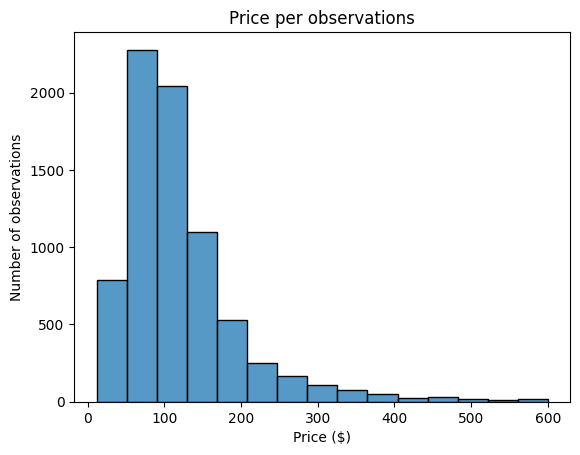

In [46]:
sns.histplot(
    data = listings_clean,
    x = 'price', binwidth=40
)
plt.title('Price per observations')
plt.xlabel('Price ($)')
plt.ylabel('Number of observations')


Findings:<br>

In this histplot we can see that the price per night is between 50 and 150 dollars in over 2000 observations.<br>
While the price per night is 200 dollars in less than 500 observations.

5. Then I'm creating a boxplot to visualize the median, 25% and 75% as well as the outliers.

Text(0, 0.5, 'Number of observations')

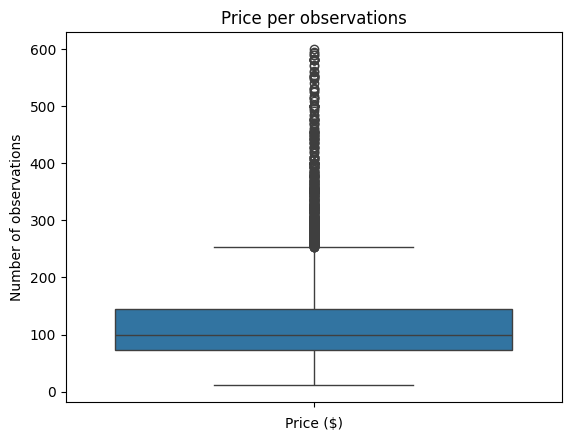

In [47]:
sns.boxplot(
    data = listings_clean,
    y = 'price'
)
plt.title('Price per observations')
plt.xlabel('Price ($)')
plt.ylabel('Number of observations')

Findings:<br>
- In this boxplot we can see that the median is 100.<br>
- 25% of the observations are lower than 100.<br>
- 75% of the observations are between 100 and 200.<br>
- Above 300 are outliers.

6. Removing the outliers.

In [48]:

q3 = listings_clean['price'].quantile(0.75)
q1 = listings_clean['price'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 + (1.5 * iqr)
listings_outliers = listings_clean[
    (listings_clean['price'] < upper_bound) &
    (listings_clean['price'] > lower_bound)
]


7. Plotting the same graph without outliers.

Text(0, 0.5, 'Number of observations')

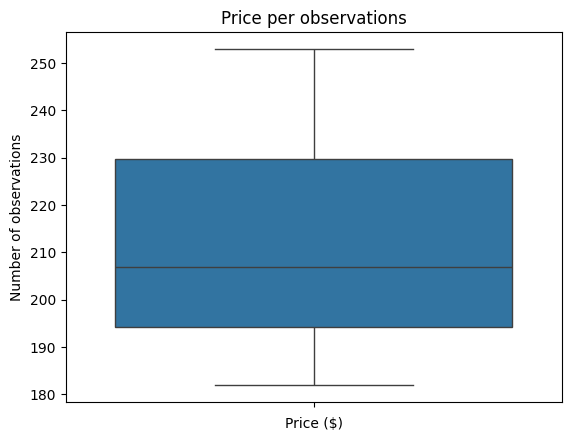

In [49]:
sns.boxplot(
    data = listings_outliers,
    y = 'price'
)
plt.title('Price per observations')
plt.xlabel('Price ($)')
plt.ylabel('Number of observations')

Findings:<br>
- 25% of the observations are between 190 and 205 dollars.
- 75% of the observations are between 210 and 230 dollars.
- The median is 205 dollars.

8. Visualizing the columns' names.

In [50]:
listings_outliers.columns

Index(['id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_commun

9. Here I'll creating a plot to find out if being a superhost can affect the price.

Text(0, 0.5, 'Price($)')

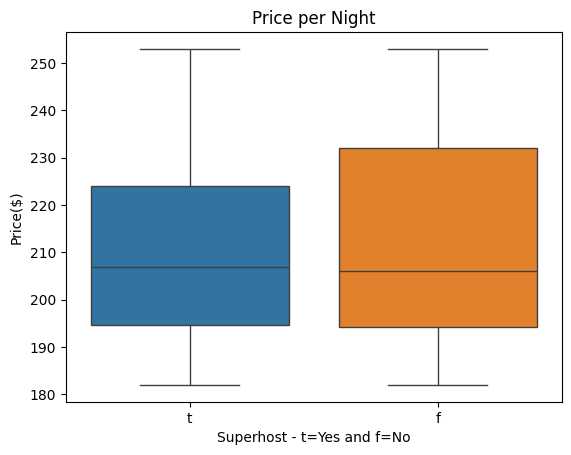

In [51]:
sns.boxplot(
    data=listings_outliers, y = 'price', x='host_is_superhost', hue='host_is_superhost')
plt.title("Price per Night")
plt.xlabel("Superhost - t=Yes and f=No")
plt.ylabel("Price($)")

Findings:
In this boxplot we can see that being a superhost does not affect the price.<br>
- The price for those that are superhost range from 195 to 225 per night.<br>
- While the price for those that are not range from 195 to 235 per night.


10.  For the next graph I'm checking the amount of beds per listing.

In [52]:
listings_clean['beds'].value_counts()

beds
2.0     2306
1.0     2193
3.0     1421
4.0      838
5.0      355
6.0      157
7.0       85
8.0       45
10.0      23
9.0       19
12.0      12
13.0       8
11.0       8
14.0       4
16.0       4
15.0       3
18.0       3
20.0       2
25.0       1
17.0       1
Name: count, dtype: int64

11. As there are just a few observations with more than 6 beds I'm saving the variable listing_outliers with the column beds only with the listings with less than 6 beds.

In [53]:
listings_outliers = listings_outliers[listings_outliers['beds']<=6]

 12. For the next plot I'm comparing the numbers of beds, neighbourhood and prices.<br>
In orther to do that and for a better visualization, first I'm checking the columns values and the median of the price according to the neighbourhood and number of beds.

In [54]:
listings_outliers[['beds', 'neighbourhood_cleansed']].value_counts()


beds  neighbourhood_cleansed
3.0   Centro                    130
2.0   Centro                    107
4.0   Centro                     76
1.0   Centro                     64
5.0   Centro                     42
6.0   Centro                     27
3.0   Este                       24
4.0   Este                       14
      Carretera de Cadiz         12
3.0   Carretera de Cadiz         11
      Cruz De Humilladero        10
2.0   Este                        9
4.0   Cruz De Humilladero         8
5.0   Carretera de Cadiz          7
      Este                        5
2.0   Cruz De Humilladero         4
6.0   Carretera de Cadiz          3
1.0   Carretera de Cadiz          3
      Este                        3
5.0   Teatinos-Universidad        2
6.0   Churriana                   2
5.0   Puerto de la Torre          2
      Churriana                   2
1.0   Bailen-Miraflores           2
4.0   Puerto de la Torre          2
      Campanillas                 2
2.0   Carretera de Cadiz          2

In [55]:
listings_outliers.groupby(['beds', 'neighbourhood_cleansed'])['price'].median()

beds  neighbourhood_cleansed
1.0   Bailen-Miraflores         197.5
      Carretera de Cadiz        200.0
      Centro                    205.5
      Este                      203.0
2.0   Carretera de Cadiz        214.0
      Centro                    205.0
      Churriana                 235.0
      Cruz De Humilladero       200.5
      Este                      202.0
      Teatinos-Universidad      215.0
3.0   Carretera de Cadiz        200.0
      Centro                    206.5
      Churriana                 248.0
      Cruz De Humilladero       213.5
      Este                      201.0
4.0   Bailen-Miraflores         213.0
      Campanillas               202.0
      Carretera de Cadiz        211.0
      Centro                    205.5
      Churriana                 250.0
      Cruz De Humilladero       222.0
      Este                      233.0
      Puerto de la Torre        215.5
5.0   Campanillas               241.0
      Carretera de Cadiz        195.0
      Centro         

13.  Plot comparing the numbers of beds, neighbourhood and prices.

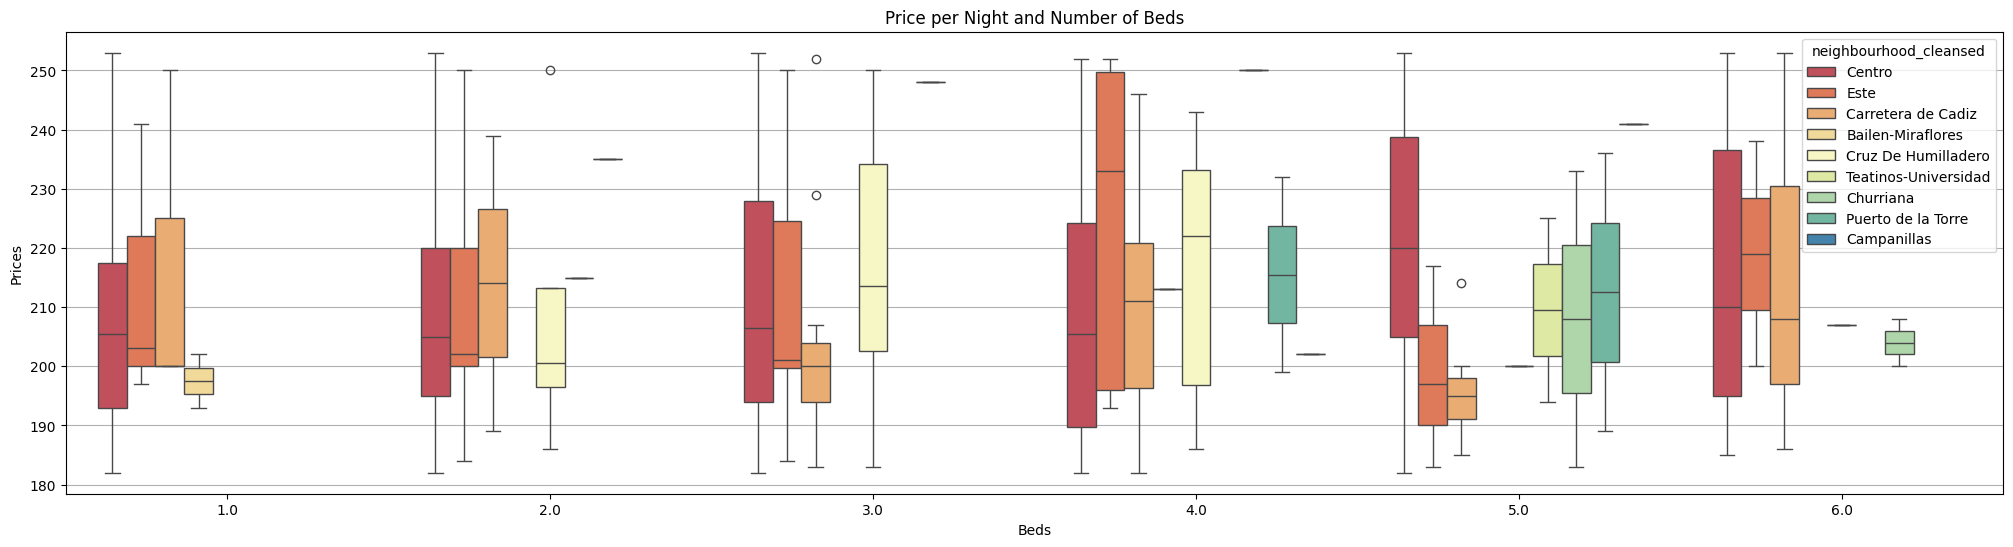

In [56]:
plt.figure(figsize = (25,6))
sns.boxplot(data=listings_outliers, y ='price', x='beds', hue = 'neighbourhood_cleansed', palette='Spectral')
plt.title("Price per Night and Number of Beds")
plt.xlabel('Beds')
plt.ylabel('Prices')
plt.grid(axis = 'y')


Findings:<br>
- Neighbourhood 'Centro': The average price in houses with 1 to 4 beds is 205, in houses with 5 beds it increases to 220.<br> Therefore, in this neighbourhood there is no correlation between price and number of beds.
- Houses in the neighbourhood 'Este': The average price in houses with 1 to 3 beds is around 202, although it has a peak to 233 in houses with 4 beds, and it has a significant decrease to 197 in houses with 5 bedrooms.
- Houses in the neighbourhood 'Carretera de Cadiz': The prices ranges from 195 to 215 and are not correlated to the number of beds.
- Houses in the neighbourhood 'Cruz de Humiladero': In this neighbourhood the prices increases according to the number of beds, ranging from 200 to 225.




14. The next plot is to compare the listings_outliers, with the host_response_rate and the price.<br>
    First I'll round the digits of the host_response_rate to one digit after the comma.

In [57]:
#Need to import numpy first.
import numpy as np
np.round(listings_outliers['host_acceptance_rate'], 2)

17      100.0
69      100.0
84      100.0
85      100.0
101     100.0
        ...  
7545    100.0
7561    100.0
7566    100.0
7570    100.0
7597     89.0
Name: host_acceptance_rate, Length: 585, dtype: float64

Text(0, 0.5, 'Price ($)')

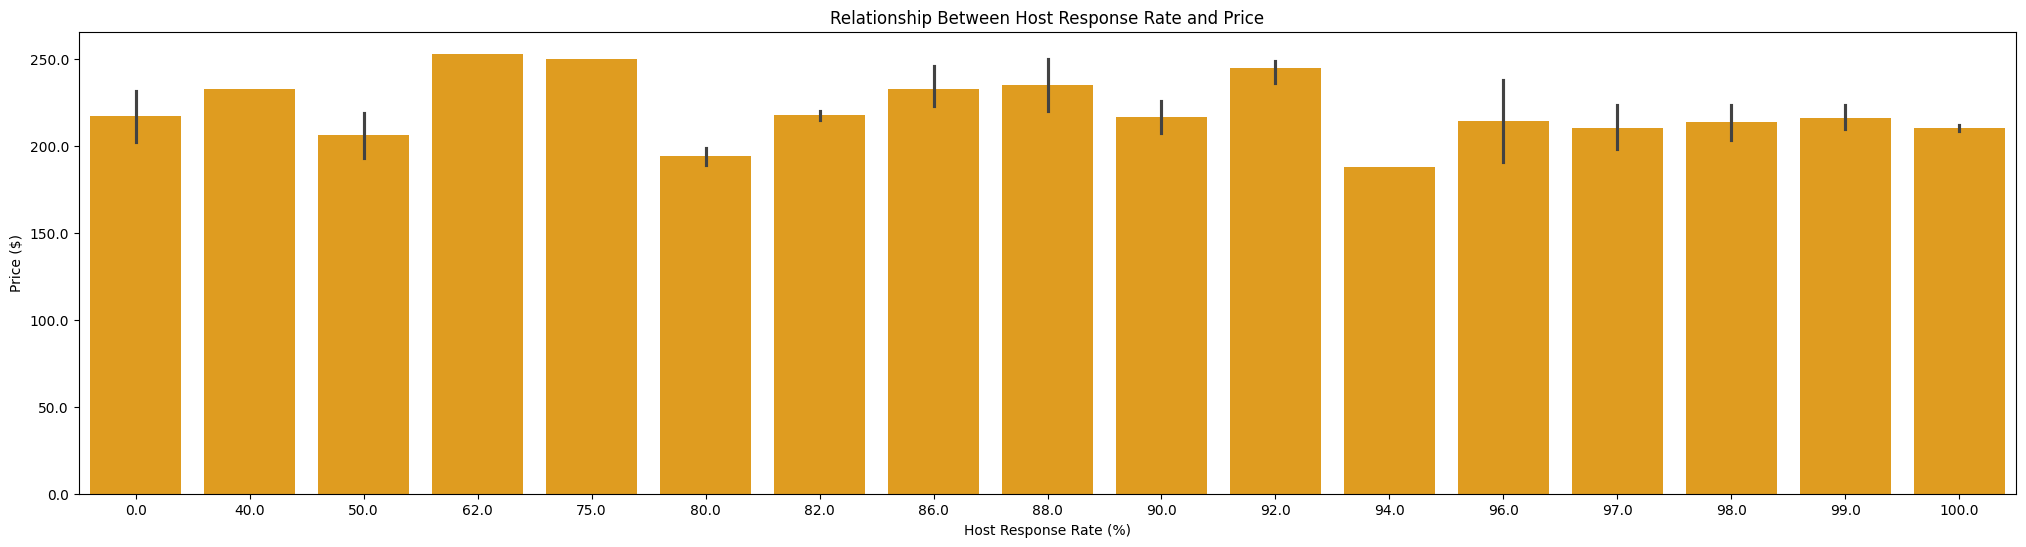

In [58]:
import matplotlib.ticker as mticker

plt.figure(figsize = (25,6))
barplot = sns.barplot(data=listings_outliers, x='host_response_rate', y='price', color='#FFA500')
barplot.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
plt.title('Relationship Between Host Response Rate and Price')
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Price ($)')





Findings:<br>

The cost of the listings with reviews of 100% are around 180, while there are listings with 62% that costs up to 255.

15.  In this plot I'll explore the data I preprocessed before.

C:\Users\pmort\AppData\Local\Temp\ipykernel_1324\3376959521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=listings_outliers, x ='price', y='host_response_time', palette='Spectral')


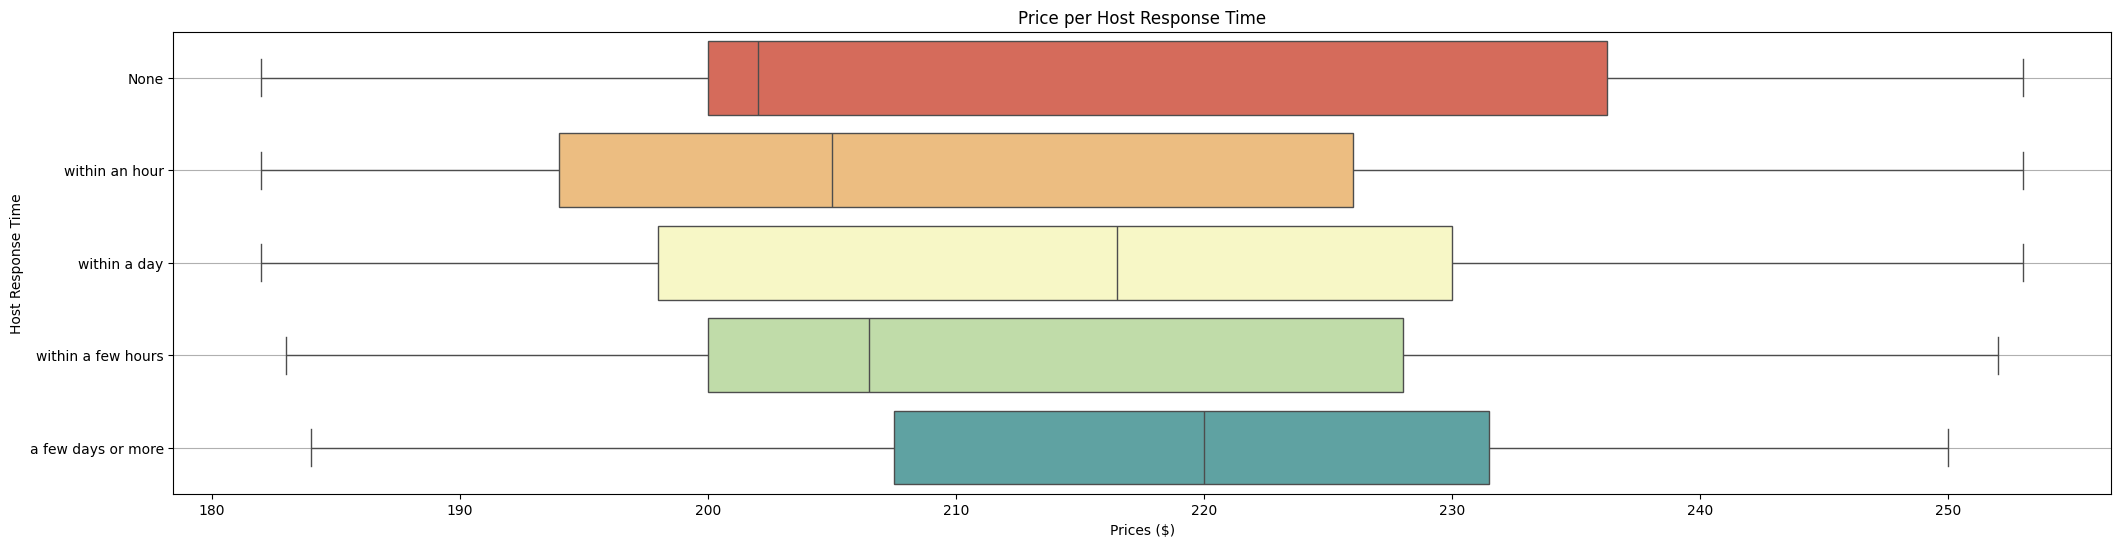

In [59]:
plt.figure(figsize = (25,6))
sns.boxplot(data=listings_outliers, x ='price', y='host_response_time', palette='Spectral')
plt.title("Price per Host Response Time")
plt.ylabel('Host Response Time')
plt.xlabel('Prices ($)')
plt.grid(axis = 'y')

Findings:<br>
- The listing that answer within an hour have a minimum price of 195 and a maximum price of 225.
- The listings that answer a few days or more have a have a minimum price of 208 and a maximum price of 232.<br>
Therefore, there is no correlation between the price and the response time.


16. In the next plot I'll compare the host_acceptance_rate with the host_response_rate

In [60]:
listings_clean[['host_acceptance_rate', 'host_response_rate']].value_counts()

host_acceptance_rate  host_response_rate
100.0                 100.0                 3568
99.0                  100.0                  636
98.0                  100.0                  299
100.0                 99.0                   219
                      98.0                   214
                                            ... 
93.0                  89.0                     1
28.0                  0.0                      1
29.0                  0.0                      1
90.0                  90.0                     1
95.0                  83.0                     1
Name: count, Length: 251, dtype: int64

Text(0, 0.5, 'Host Acceptance Rate')

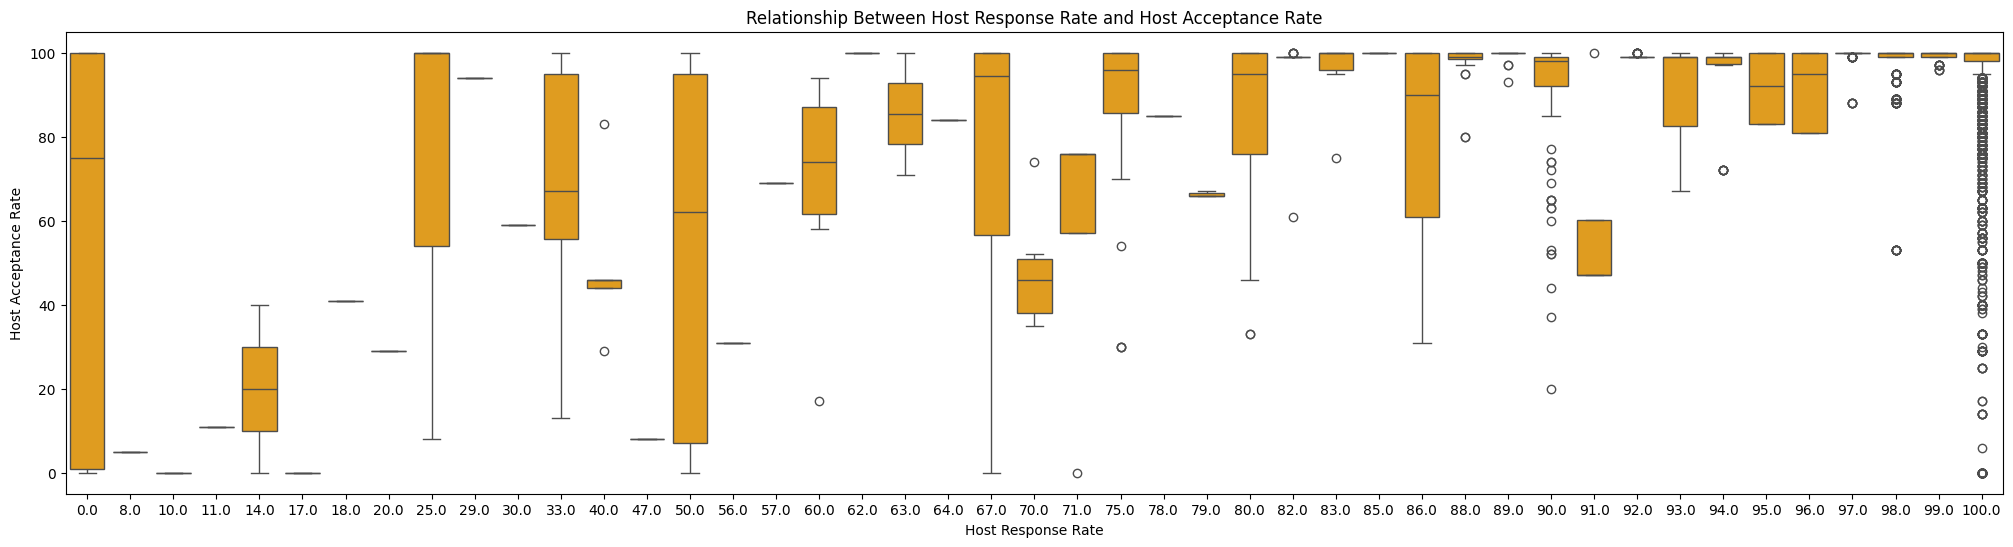

In [63]:
plt.figure(figsize = (25,6))
sns.boxplot(data=listings_clean, x='host_response_rate', y= 'host_acceptance_rate', color='#FFA500')
plt.title('Relationship Between Host Response Rate and Host Acceptance Rate')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')